# **Build Linear Regression Model in Python**

Devansh Mistry

In this notebook, I will be showing you how to build a linear regression model in Python using the scikit-learn package.

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

## **Load the Diabetes dataset** (via scikit-learn)

### **Import library**

In [ ]:
from sklearn import datasets

### **Load dataset**

In [ ]:
diabetes = datasets.load_diabetes()

In [ ]:
diabetes

{'DESCR': '.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - Age\n      - Sex\n      - Body mass index\n      - Average blood pressure\n      - S1\n      - S2\n      - S3\n      - S4\n      - S5\n      - S6\n\nNote: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).\n\nSource URL:\nhttps://www4.stat.ncsu.edu/~boos/var.select/

### **Description of the Diabetes dataset**

In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### **Feature names**

In [ ]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### **Create X and Y data matrices**

In [ ]:
X = diabetes.data
Y = diabetes.target

In [ ]:
X.shape, Y.shape

((442, 10), (442,))

### **Load dataset + Create X and Y data matrices (in 1 step)**

In [ ]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [ ]:
X.shape, Y.shape

((442, 10), (442,))

## **Load the Boston Housing dataset (via GitHub)**

The Boston Housing dataset was obtained from the mlbench R package, which was loaded using the following commands:

```
library(mlbench)
data(BostonHousing)
```

For your convenience, I have also shared the [Boston Housing dataset](https://github.com/dataprofessor/data/blob/master/BostonHousing.csv) on GitHub package.

### **Import library**

In [ ]:
import pandas as pd

### **Download CSV from GitHub**

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2021-07-29 14:09:28--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2021-07-29 14:09:28--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.002s  

2021-07-29 14:09:28 (22.4 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



### **Read in CSV file**

In [ ]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### **Split dataset to X and Y variables**

In [ ]:
Y = BostonHousing.medv
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [ ]:
X = BostonHousing.drop(['medv'], axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## **Data split**

### **Import library**

In [ ]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [ ]:
X_train.shape, Y_train.shape

((404, 13), (404,))

In [ ]:
X_test.shape, Y_test.shape

((102, 13), (102,))

## **Linear Regression Model**

### **Import library**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [ ]:
model = linear_model.LinearRegression()

#### Build training model

In [ ]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Apply trained model to make prediction (on test set)

In [ ]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-8.86009393e-02  4.09130152e-02  5.73160723e-03  2.41207768e+00
 -1.62717785e+01  4.11318276e+00 -6.19163309e-03 -1.51019192e+00
  2.99686985e-01 -1.25169661e-02 -9.08618209e-01  1.03939855e-02
 -5.03368835e-01]
Intercept: 33.252247843469156
Mean squared error (MSE): 20.15
Coefficient of determination (R^2): 0.75


### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [ ]:
r2_score(Y_test, Y_pred)

0.7457979601563851

In [ ]:
r2_score(Y_test, Y_pred).dtype

dtype('float64')

We will be using the modulo operator to format the numbers by rounding it off.

In [ ]:
'%f' % 0.523810833536016

'0.523811'

We will now round it off to 3 digits

In [ ]:
'%.3f' % 0.523810833536016

'0.524'

We will now round it off to 2 digits

In [ ]:
'%.2f' % 0.523810833536016

'0.52'

## **Scatter plots**

### **Import library**

In [ ]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [ ]:
Y_test

199    34.9
468    19.1
339    19.0
301    22.0
124    18.8
       ... 
392     9.7
269    20.7
151    19.6
422    20.8
135    18.1
Name: medv, Length: 102, dtype: float64

In [ ]:
import numpy as np
np.array(Y_test)

array([34.9, 19.1, 19. , 22. , 18.8, 31.5, 37.9, 24.3, 21.1, 19.3, 10.5,
       12.5, 10.4, 21.4, 10.9, 10.9, 21.4, 36.2, 21. , 24.3, 29.4, 13.5,
       12.1, 18.2, 16.7, 19.4, 30.1, 19.2, 23.2, 21.9, 23.9, 29.9, 50. ,
       22.2, 34.9, 36. , 20.5, 21.6, 36.2, 25. , 10.2, 21.7, 10.2, 21.2,
       17. , 24.4, 16.6, 19.5, 12.7, 18. , 50. , 23.9, 10.5, 17.5, 14.3,
       20.8, 24.1, 41.3, 22.1, 21.9, 22.8, 19.6, 16.4,  7.4,  8.3, 11.8,
       22.6, 21.8, 30.1, 23.7, 26.6, 23.7, 15.7, 22. , 21.7, 22.9, 21.7,
       27.9, 20.3, 14.9, 50. , 24.3, 11.3, 20.6, 32.5, 21.8, 14.8, 24.6,
       17.8, 24.5, 21.4, 24.8, 28.6, 50. , 24.7, 37. , 16.3,  9.7, 20.7,
       19.6, 20.8, 18.1])

In [ ]:
Y_pred

array([29.87444897, 17.28991125, 21.52921875, 28.87398307, 20.48060152,
       32.96812298, 34.07830625, 28.61768869, 20.91117591, 21.29859622,
       13.34253695, 19.65484614, 16.47120675, 20.63485732, 19.06050473,
       14.56871374, 22.11176133, 28.28394642, 21.1618203 , 19.9418259 ,
       31.05155393, 12.76058338, 18.66387425, 19.36102127, 19.88823786,
       23.26271838, 34.97632128, 20.17495387, 25.77968479, 38.02556866,
       27.93624221, 31.6179757 , 44.35933777, 19.60650694, 34.23927574,
       36.63281719, 19.52131839, 25.55364902, 27.96098427, 22.86664475,
        6.7135559 , 21.88561527, 17.36977112, 21.26881216, 22.27508382,
       24.35329762, 15.50271252, 20.38552959, 12.52147129, 19.14286582,
       40.35137794, 27.56908936,  6.49624324, 17.08757758, 17.06945234,
       18.11393555, 25.76975987, 33.09574901, 27.04398147, 23.39617447,
       28.17872174, 19.52405169, 19.29996082,  6.20701209, 13.39352786,
        8.95340166, 26.50785675, 21.05211124, 24.85185163, 27.39

#### Making the scatter plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


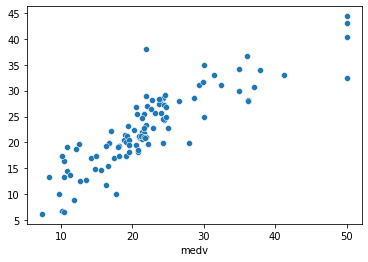

In [ ]:
sns.scatterplot(Y_test, Y_pred)

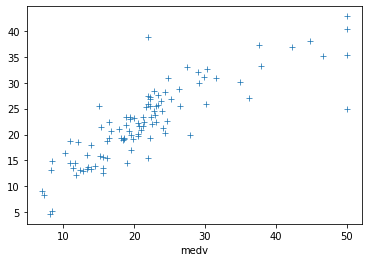

In [ ]:
sns.scatterplot(Y_test, Y_pred, marker="+")

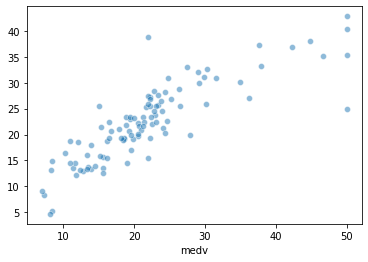

In [ ]:
sns.scatterplot(Y_test, Y_pred, alpha=0.5)